# Support Vector Machines

In [2]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

# Linear kernel SVMS

## Load datasets

In [3]:
def load_data(path):
    path = path
    data = sio.loadmat(path)
    
    return data

In [4]:
def generate_df(data, X_key, y_key):
    df = pd.DataFrame(data.get(X_key), columns=['X1', 'X2'])
    df['y'] = data.get(y_key)
    
    return df

In [5]:
data1mat = load_data('./data/ex6data1.mat')

In [6]:
data1mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [7]:
df1 = generate_df(data1mat, 'X', 'y')

In [8]:
df1.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [9]:
df1.columns

Index(['X1', 'X2', 'y'], dtype='object')

## Visualize data

In [10]:
sns.set()

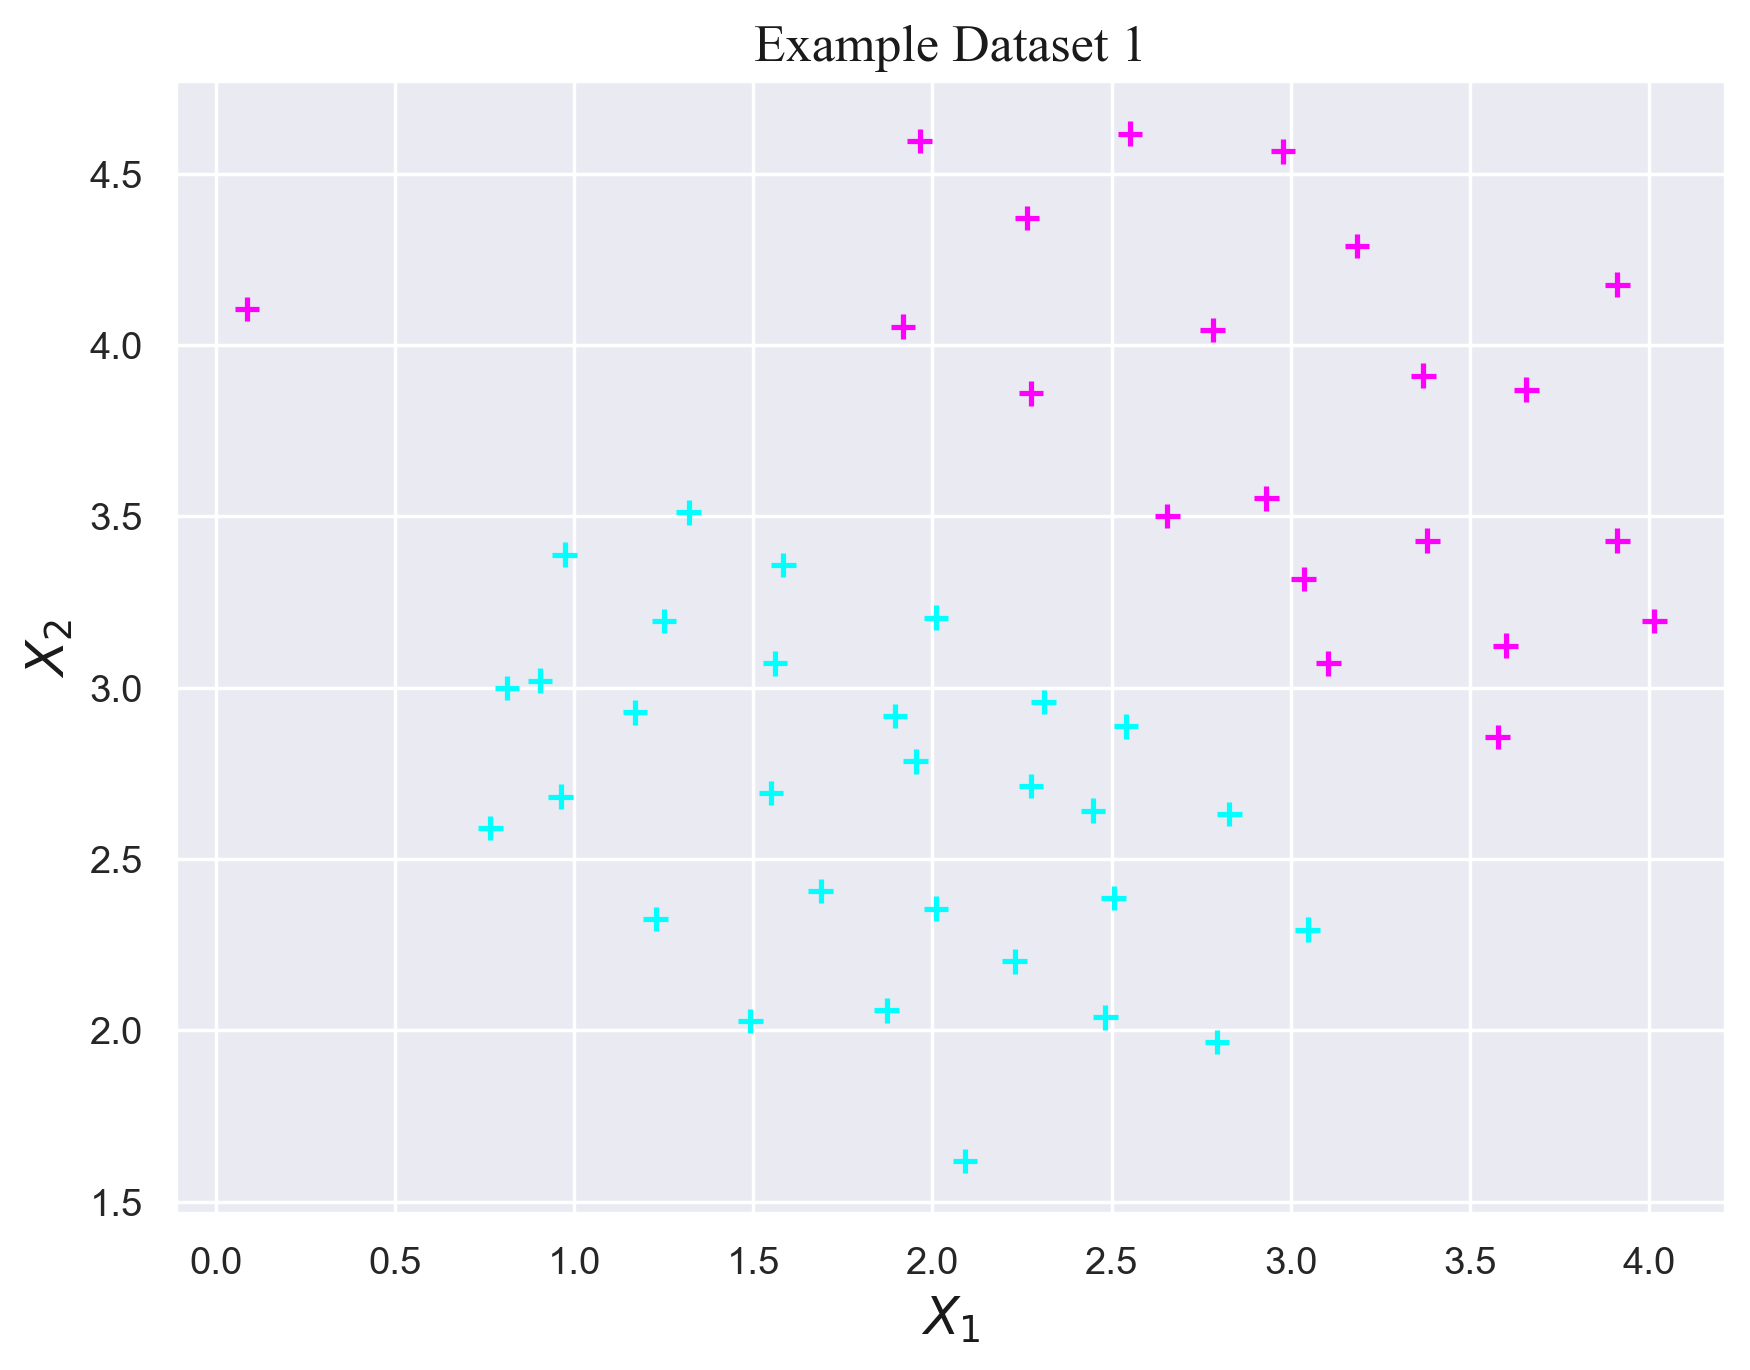

In [11]:
fig, ax = plt.subplots(figsize=(8,6), dpi =250)
plt.style.use('ggplot') 

ax.scatter(df1['X1'], df1['X2'], marker='+', s=50, c=df1['y'],cmap='cool')
font = {'family' : 'Times New Roman','weight' : 'normal','size'   : 15}
ax.set_title('Example Dataset 1', font, c='k')
# ax.set_facecolor('gray')
# ax.axis('off')
ax.set_xlabel('$X_1$', font, c = 'k')
ax.set_ylabel('$X_2$', font, c = 'k')
plt.show()

## SVM Decision Boundary with $C$=1
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC.fit

In [12]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge')
svc1.fit(df1[['X1', 'X2']], df1['y'])
svc1.score(df1[['X1', 'X2']], df1['y'])

E:\Anaconda3\install\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [13]:
x0 = df1['X1']
x1 = df1['X2']

In [14]:
a = np.c_[df1[['X1', 'X2']]]

In [15]:
svc1.decision_function(a)

array([ 0.80049079,  0.38280483,  1.37548273,  0.52072495,  0.33422663,
        0.86912136,  0.68639684,  1.61007094,  0.83323139,  1.16492478,
        1.07236193,  0.23016056,  0.33031454,  0.79390163,  0.3153548 ,
        1.27257257,  1.20946123,  1.        ,  0.56516085,  0.38984631,
       -0.43574894, -0.30896138, -0.68573506, -0.55329064, -0.33215193,
       -0.29282216, -0.43909399, -0.98214366, -0.68432214, -1.32684578,
       -1.00258019, -1.49128117, -0.61112158, -0.68348459, -0.99949108,
       -1.15170767, -1.57684499, -1.35559479, -1.03233116, -1.18519323,
       -0.77212078, -0.76724917, -0.46729914, -0.99847603, -0.50944104,
       -0.85658679, -1.55664299, -0.25435459, -1.1138039 , -1.54671948,
       -0.71203748])

In [16]:
r = svc1.predict(a).reshape(-1,1)

In [17]:
def plot_decision_boundary(model, X, y):
    #font1 = {'family' : 'Times New Roman','weight' : 'normal','style':'italic','size'   : 15}
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    fig, ax = plt.subplots(figsize=(7,5), dpi =250)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('$x_2$', fontsize=15)
    plt.xlabel('$x_1$', fontsize=15)
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

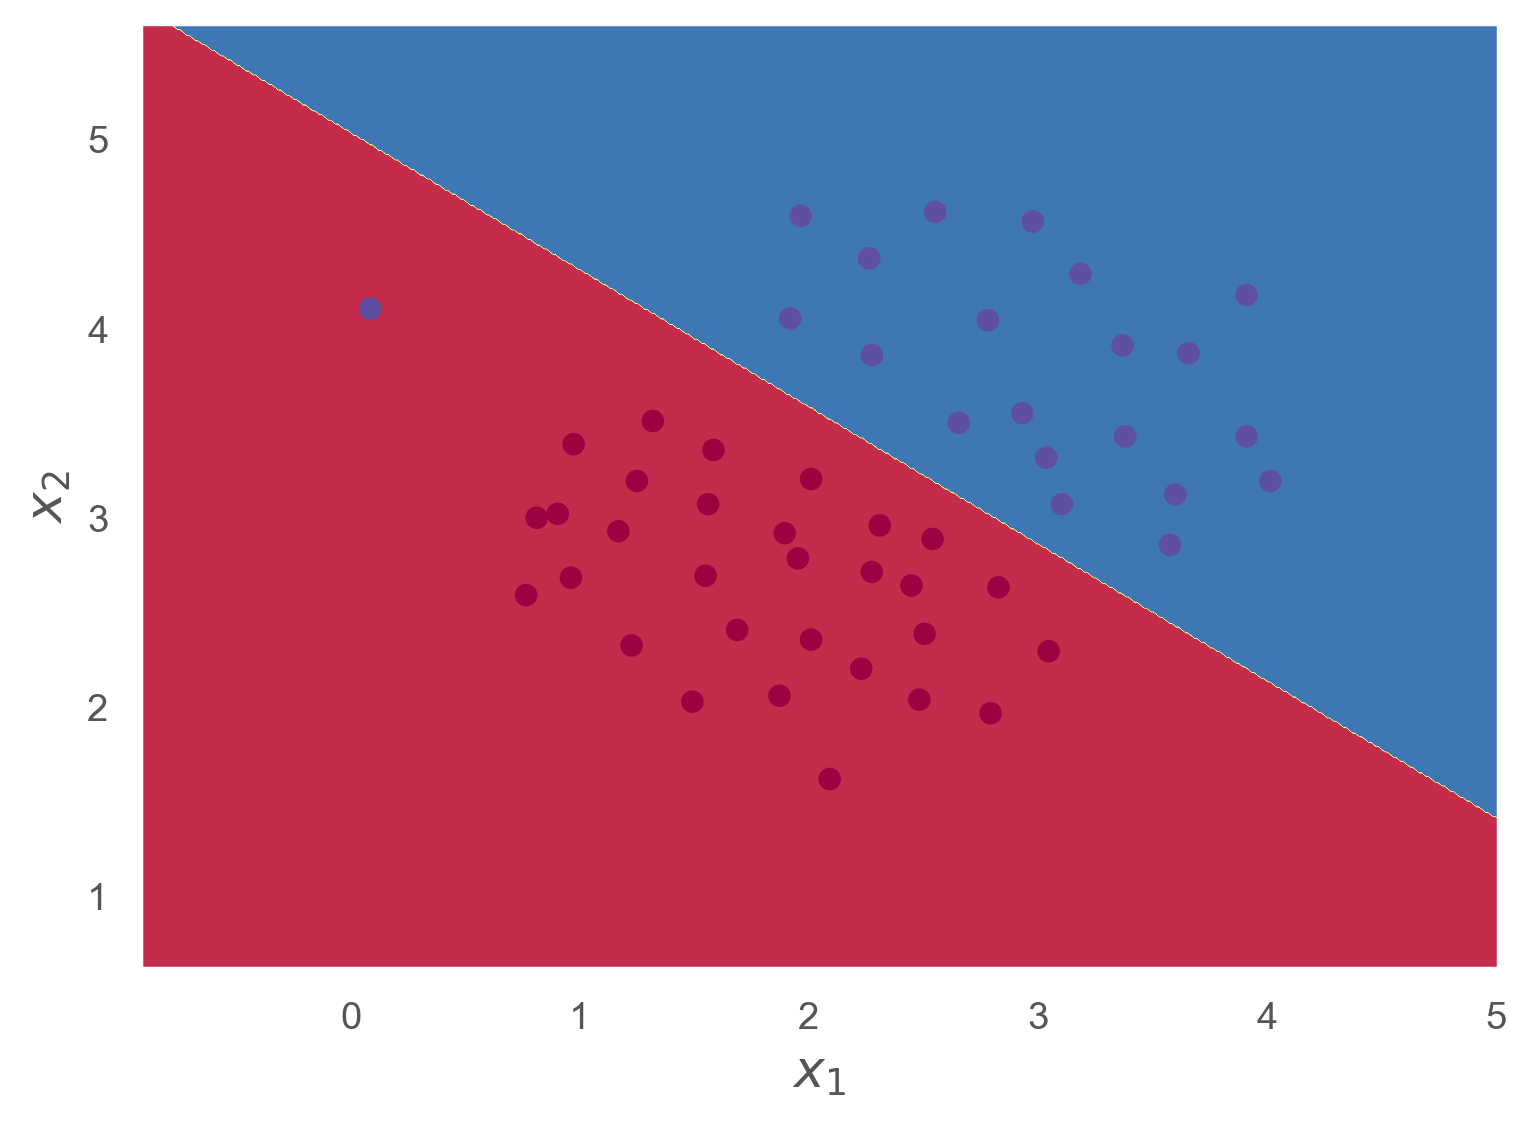

In [18]:
plot_decision_boundary(lambda x:svc1.predict(x), a.T, np.squeeze(df1['y']))

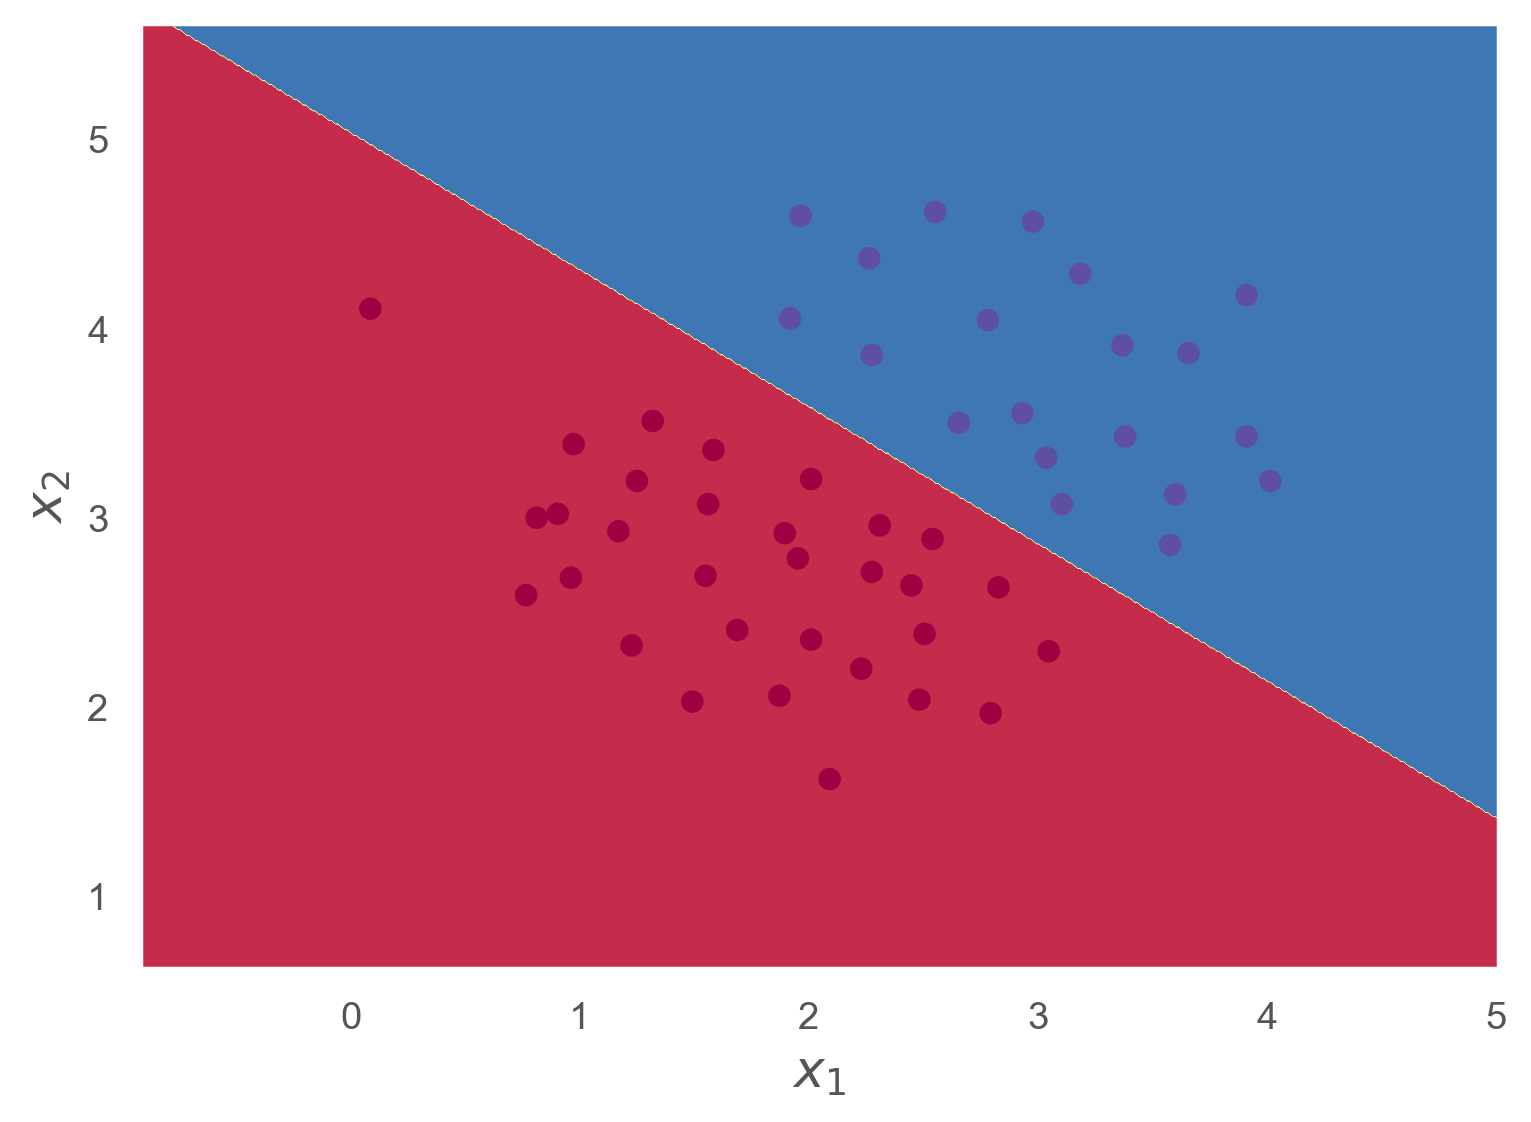

In [19]:
plot_decision_boundary(lambda x:svc1.predict(x), a.T, np.squeeze(svc1.predict(np.c_[df1[['X1', 'X2']]])))

In [20]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(df1[['X1', 'X2']], df1['y'])
svc100.score(df1[['X1', 'X2']], df1['y'])

E:\Anaconda3\install\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

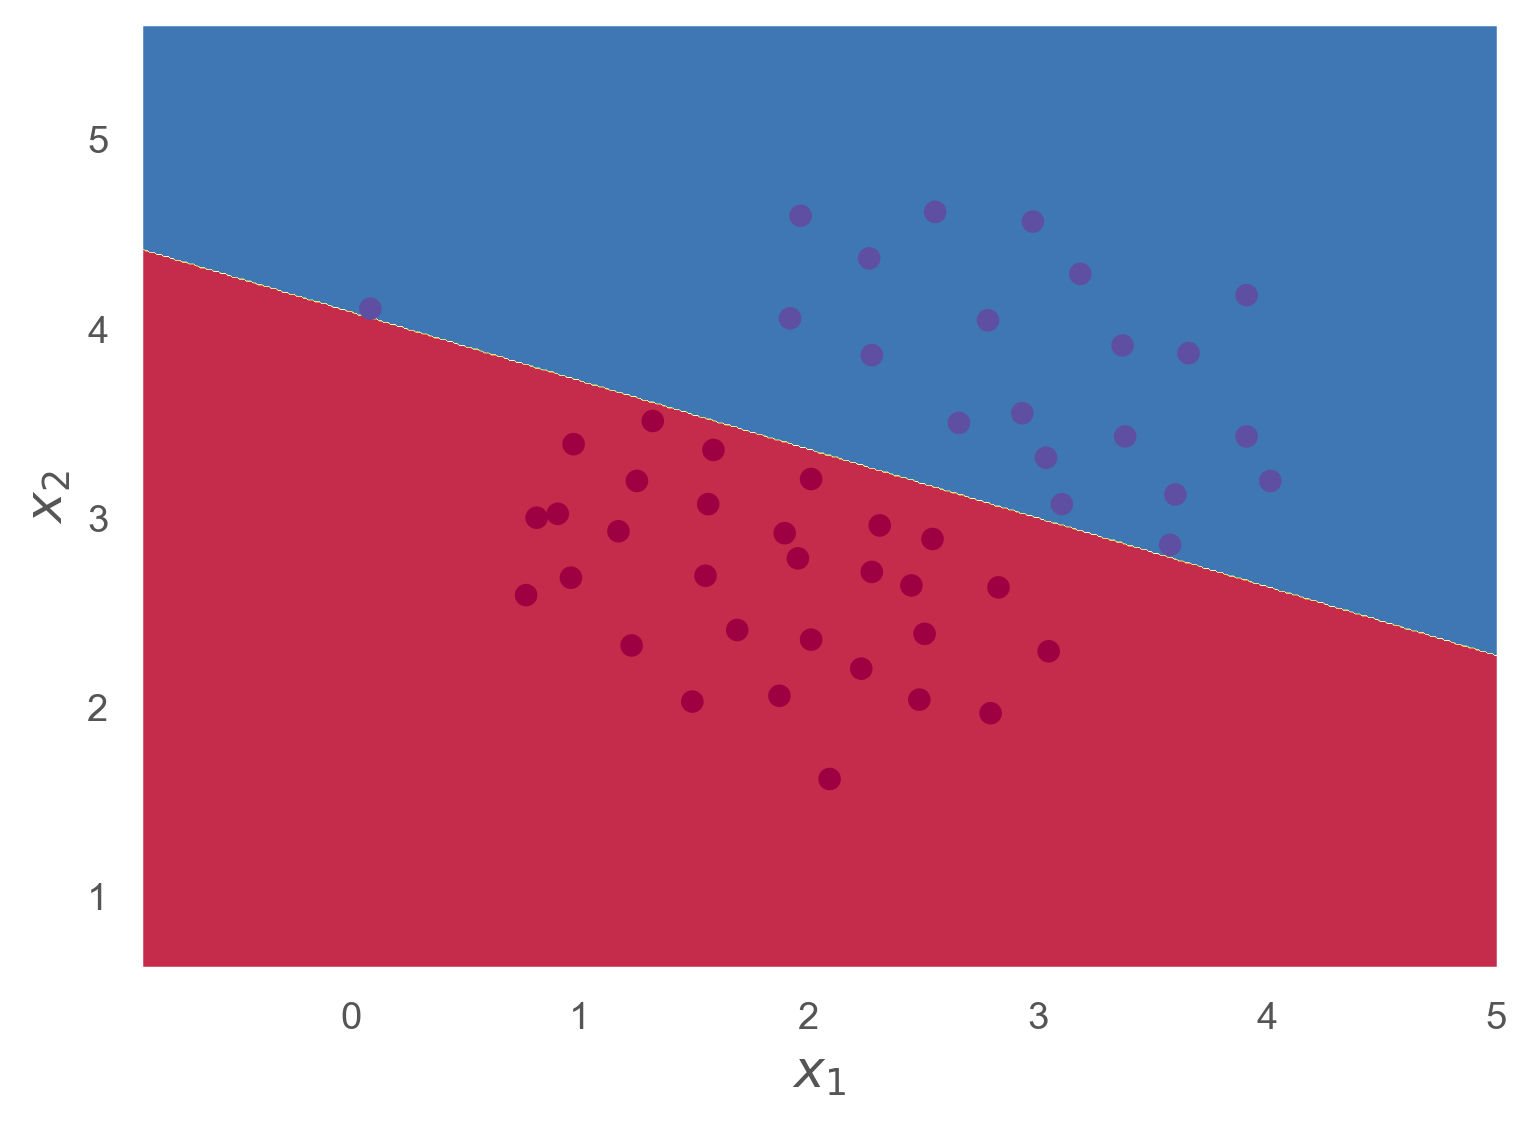

In [21]:
plot_decision_boundary(lambda x:svc100.predict(x), a.T, np.squeeze(svc100.predict(np.c_[df1[['X1', 'X2']]])))

E:\Anaconda3\install\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


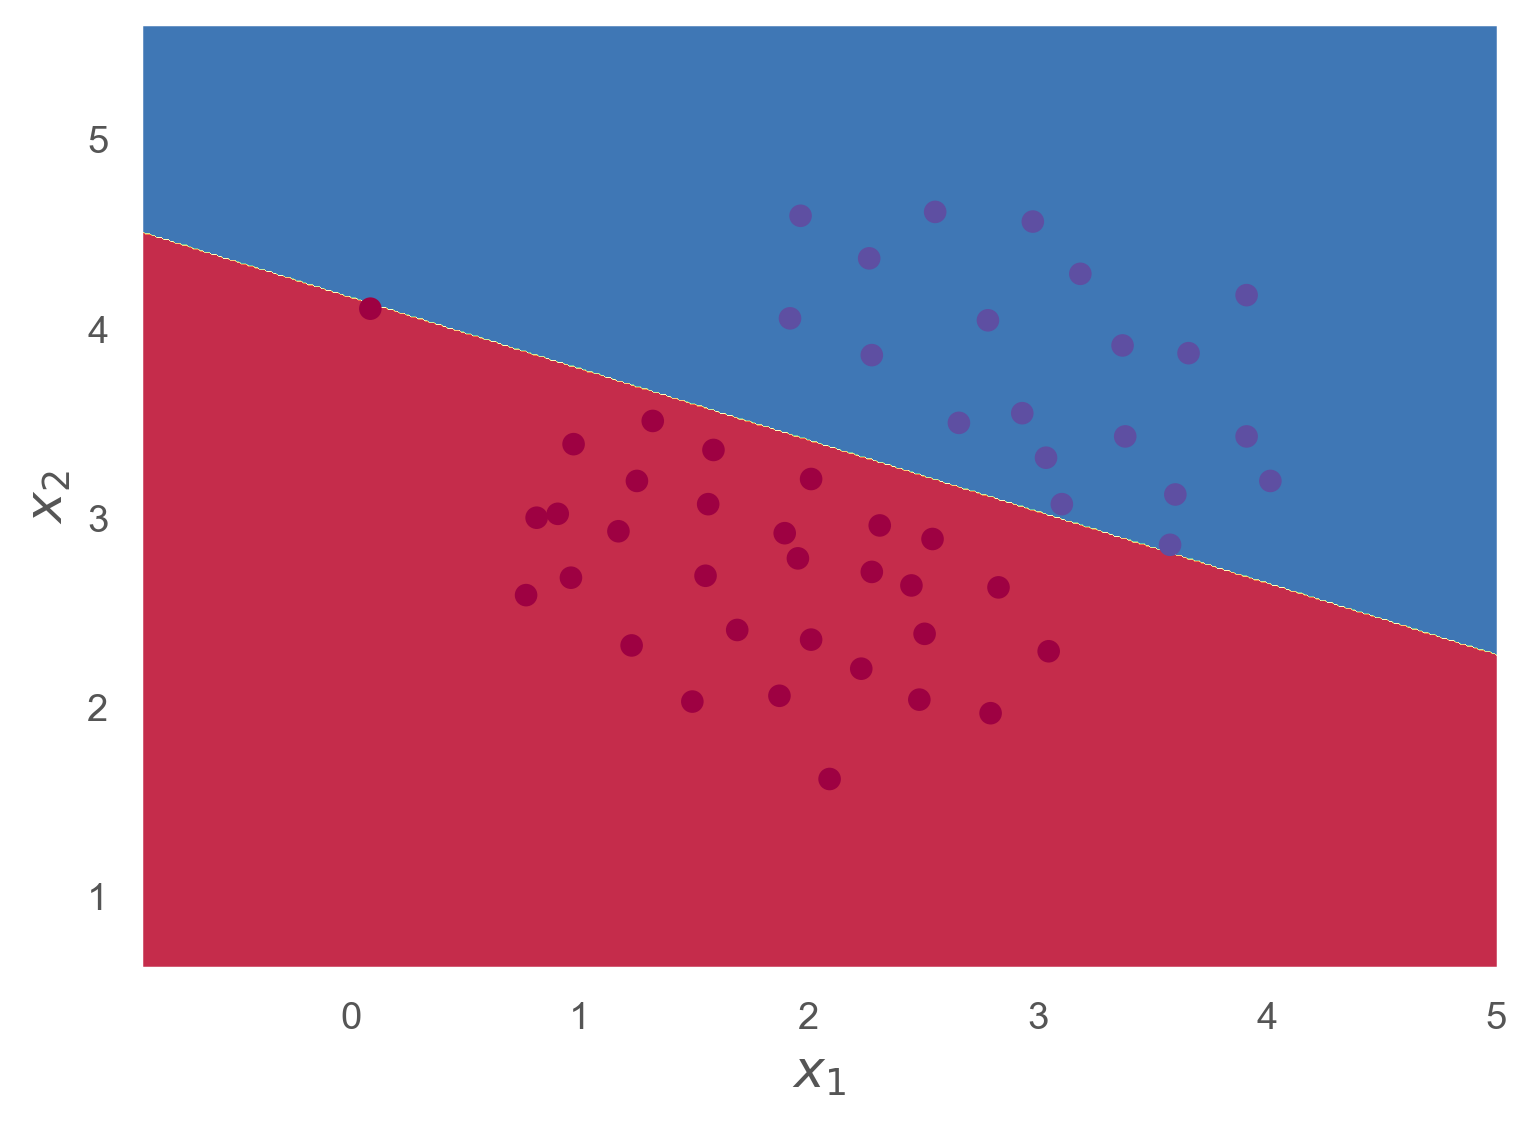

In [22]:
svcN = sklearn.svm.LinearSVC(C=10**5, loss='hinge')
svcN.fit(df1[['X1', 'X2']], df1['y'])
svcN.score(df1[['X1', 'X2']], df1['y'])
plot_decision_boundary(lambda x:svcN.predict(x), a.T, np.squeeze(svcN.predict(np.c_[df1[['X1', 'X2']]])))

# Guassian kernels

$$K(x_i, x_j)=exp\Big ({-\frac{||x_i-x_j||^2}{2\sigma^2}}\Big )$$

- 高斯核函数（Gaussian Kernel）：$K(x,z)=exp\big (−\gamma||x−z||^2 \big )$ $\big (这里\gamma=\frac{1}{2\sigma^2}\big )$，也称为径向基核函数（Radial Basis Function,RBF），它是非线性分类SVM最主流的核函数。libsvm默认的核函数就是它。$\gamma$大于0，需要自己调参定义。

- https://www.cnblogs.com/albert-yzp/p/9525162.html

In [23]:
data2 = load_data('./data/ex6data2.mat')

In [24]:
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [25]:
df2 = generate_df(data2, 'X', 'y')

In [26]:
df2.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [27]:
df2.shape

(863, 3)

In [28]:
df2[['X1','X2']]

,X1,X2
0,0.107143,0.603070
1,0.093318,0.649854
2,0.097926,0.705409
3,0.155530,0.784357
4,0.210829,0.866228
...,...,...
858,0.994240,0.516667
859,0.964286,0.472807
860,0.975806,0.439474
861,0.989631,0.425439


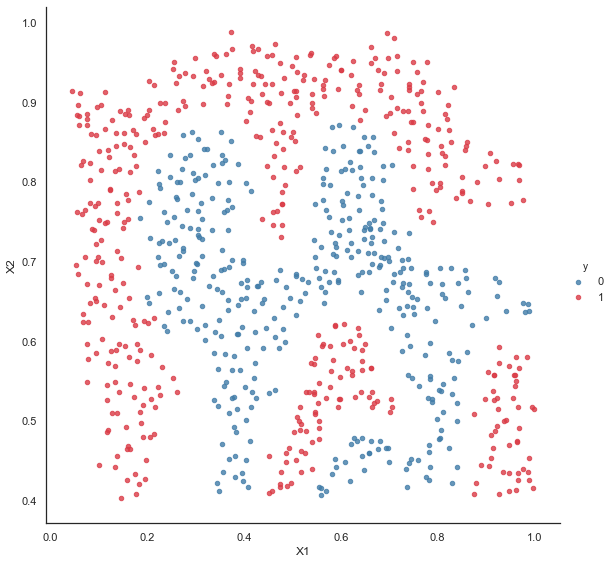

In [29]:
sns.set(context="notebook", style="white", color_codes=False, palette=sns.diverging_palette(240, 10, n=2))
sns.lmplot('X1', 'X2', hue='y', data=df2, 
           height=8, 
           fit_reg=False, 
           scatter_kws={"s": 20}
          )
plt.show()

In [30]:
svc = sklearn.svm.SVC(C = 10**8, kernel='rbf', gamma=10, probability=True)
svc.fit(df2[['X1', 'X2']], df2['y'])
svc.score(df2[['X1', 'X2']], df2['y'])

1.0

## Prediction visualize

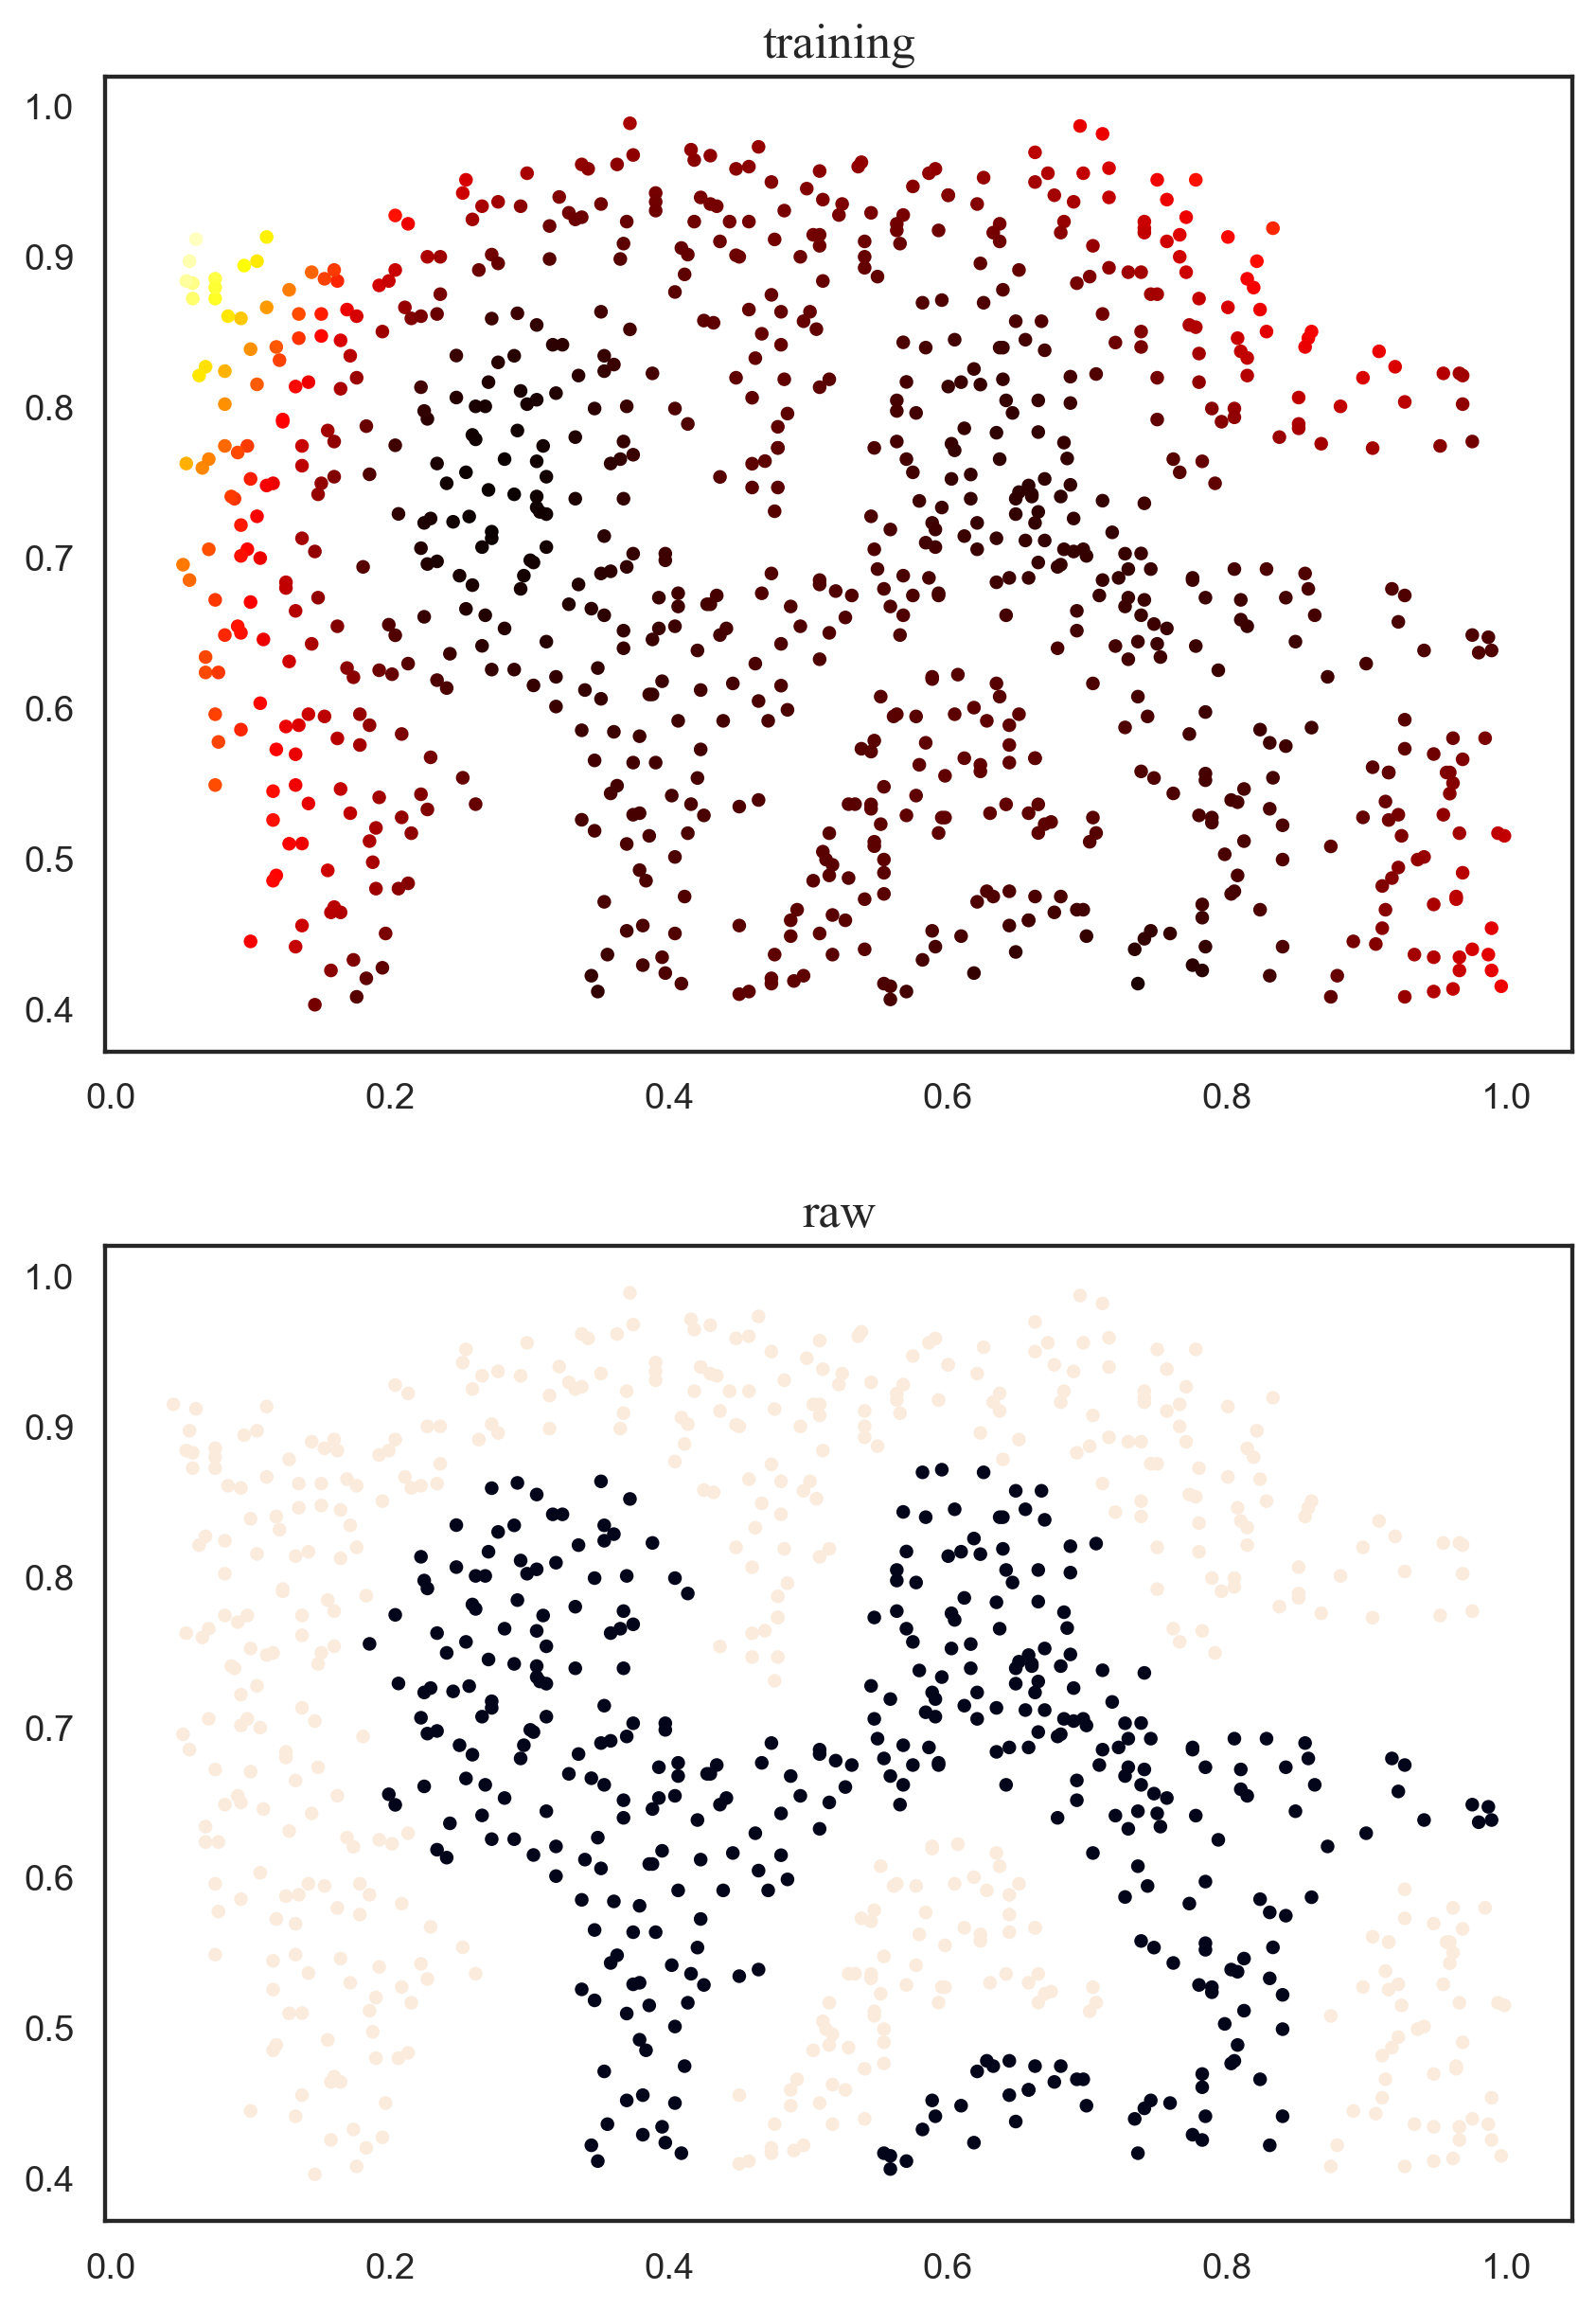

In [31]:
pre_decision = svc.decision_function(df2[['X1','X2']]).reshape(df2['X1'].shape)
font = {'family' : 'Times New Roman','weight' : 'normal','size'   : 15}
plt.subplots(figsize = (8,12), dpi = 250)
plt.subplot(2,1,1)
plt.scatter(df2['X1'],df2['X2'],s = 10,c = pre_decision,cmap = "hot")
plt.title("training", font)
plt.subplot(2,1,2)
plt.scatter(df2['X1'],df2['X2'],s = 10,c = df2['y'])
plt.title("raw", font)
plt.show()

## Plot boudaries

In [32]:
x = np.arange(df2['X1'].min(),df2['X1'].max(),0.02)## xlim
y = np.arange(df2['X2'].min(),df2['X2'].max(),0.02)## ylim
x1,x2 = np.meshgrid(x,y)
x1.shape,x2.shape

((30, 48), (30, 48))

In [33]:
z = svc.predict(np.c_[x1.ravel(),x2.ravel()]).reshape(x1.shape) ## predict
z.shape

(30, 48)

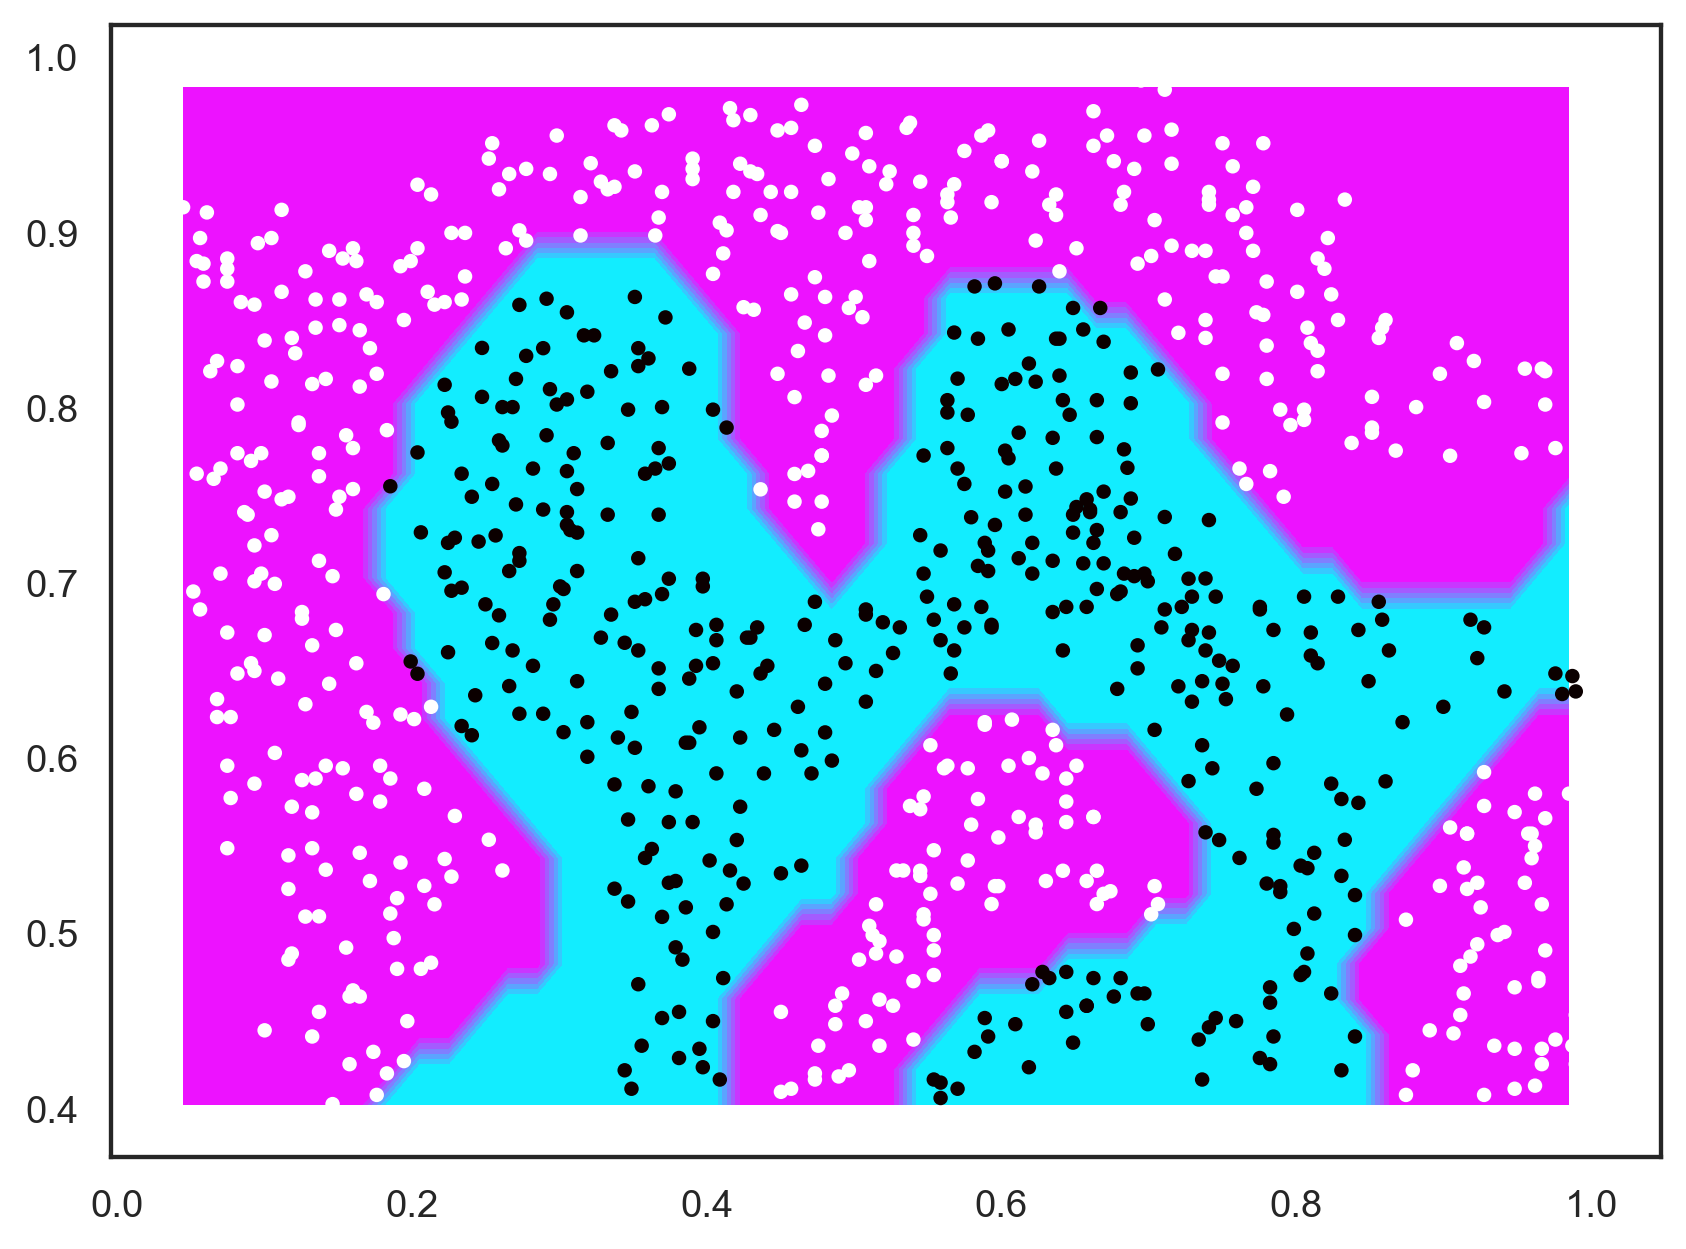

In [34]:
plt.subplots(figsize = (8,6), dpi = 250)
plt.contourf(x1,x2,z,cmap = "cool")
plt.scatter(df2['X1'],df2['X2'],s = 10,c = df2['y'],cmap = "hot")
plt.show()

# Determine the best $C$ and $\sigma$
Your task is to use the cross validation set Xval, yval to determine the best $C$ and $\sigma$ parameter to use. You should write any additional code necessary to help you search over the parameters $C$ and $\sigma$. For both $C$ and $\sigma$, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). Note that you should try all possible pairs of values for $C$ and $\sigma$ (e.g., $C$ = 0:3 and $\sigma$ = 0:1). For example, if you try each of the 8 values listed above for $C$ and for $\sigma^2$, you would end up training and evaluating (on the cross validation set) a total of 82 = 64 different models.

In [35]:
import sklearn.model_selection as msl
from sklearn import metrics

In [36]:
data3 = load_data('./data/ex6data3.mat')
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [37]:
df3_train = generate_df(data3, 'X', 'y')

In [38]:
df3_train.shape

(211, 3)

In [39]:
df3_train.head()#shape

,X1,X2,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


In [40]:
df3_cv = generate_df(data3, 'Xval', 'yval')

In [41]:
df3_cv.shape

(200, 3)

In [42]:
df3_cv.head()#shape

,X1,X2,y
0,-0.353062,-0.673902,0
1,-0.227126,0.447320,1
2,0.092898,-0.753524,0
3,0.148243,-0.718473,0
4,-0.001512,0.162928,0


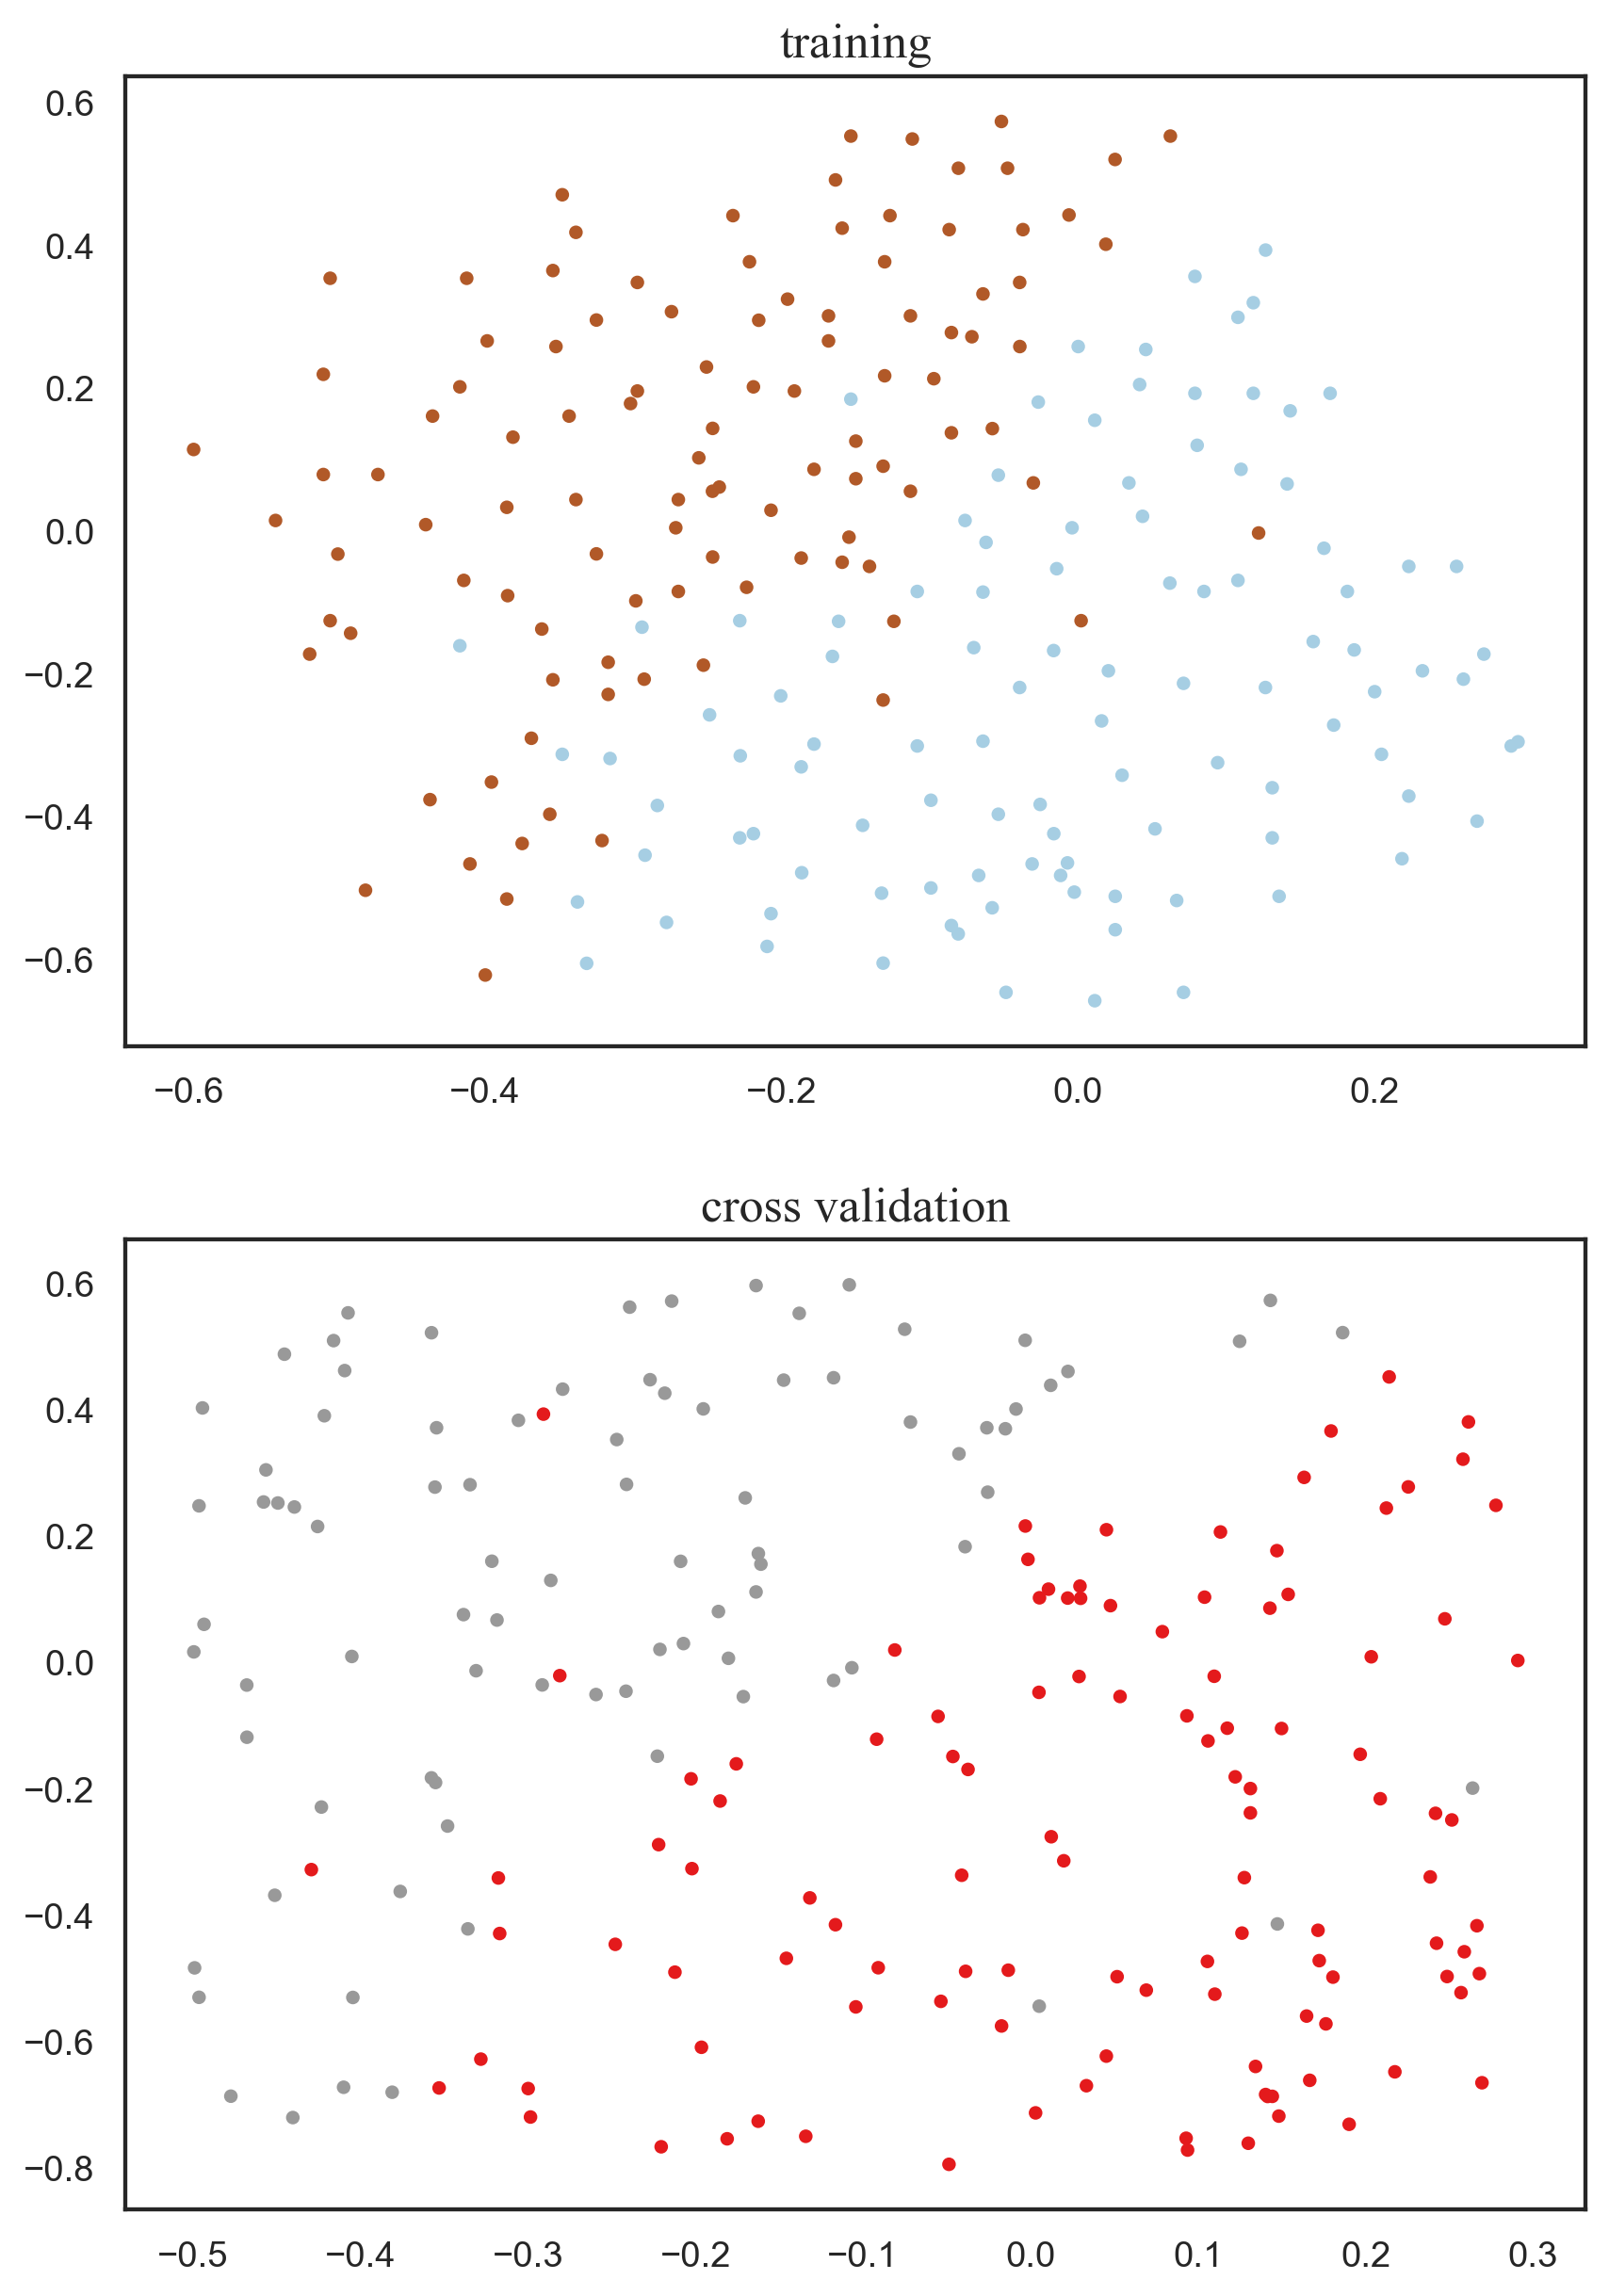

In [43]:
pre_decision = svc.decision_function(df2[['X1','X2']]).reshape(df2['X1'].shape)
font = {'family' : 'Times New Roman','weight' : 'normal','size'   : 15}
plt.subplots(figsize = (8,12), dpi = 250)
plt.subplot(2,1,1)
plt.scatter(df3_train['X1'],df3_train['X2'],s = 10,c = df3_train['y'], cmap = 'Paired')
plt.title("training", font)
plt.subplot(2,1,2)
plt.scatter(df3_cv['X1'],df3_cv['X2'],s = 10,c = df3_cv['y'], cmap = 'Set1')
plt.title("cross validation", font)
plt.show()

In [44]:
params = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
combine = [(c, sigma) for c in params for sigma in params]

In [45]:
len(combine)

64

In [46]:
results = []
for c,sigma in combine:
    svc = sklearn.svm.SVC(C = c,gamma = 0.5/sigma**2)
    svc.fit(df3_train[['X1','X2']],df3_train['y'].ravel())
    results.append(svc.score(df3_cv[['X1','X2']],df3_cv['y'].ravel()))

best_score = results[np.argmax(results)]
best_paras = combine[np.argmax(results)]
print(best_score,best_paras)

0.965 (1, 0.1)


In [47]:
best_svc = sklearn.svm.SVC(C=1, gamma=0.5/0.1**2)
best_svc.fit(df3_train[['X1','X2']],df3_train['y'].ravel())
ypred = best_svc.predict(df3_cv[['X1','X2']])

print(metrics.classification_report(df3_cv['y'], ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       113
           1       0.95      0.97      0.96        87

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



In [48]:
x1,x2 = np.arange(df3_train['X1'].min(),df3_train['X1'].max()+0.01,0.01),np.arange(df3_train['X2'].min(),df3_train['X2'].max()+0.01,0.01)
xx,yy = np.meshgrid(x1,x2)
xx.shape,yy.shape

((125, 91), (125, 91))

In [49]:
pred = best_svc.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
pred.shape

(125, 91)

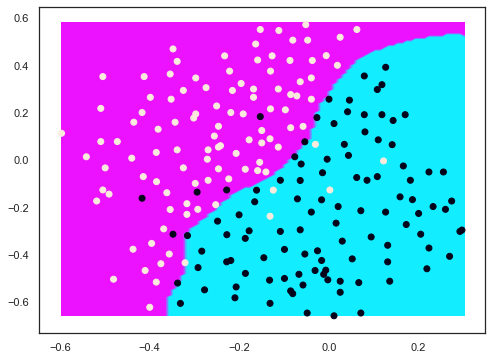

In [50]:
plt.subplots(figsize = (8, 6))
plt.contourf(xx,yy,pred,cmap = "cool")
plt.scatter(df3_train['X1'],df3_train['X2'],c = df3_train['y'])
plt.show()

# Spam Filter

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
data4_train = load_data('./data/spamTrain.mat')

In [53]:
data4_train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [54]:
data4_test = load_data('./data/spamTest.mat')

In [55]:
data4_test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])

In [56]:
data4_train['X'][0].shape

(1899,)

In [57]:
X_train, y_train = data4_train['X'], data4_train['y'].ravel()
X_test, y_test = data4_test['Xtest'], data4_test['ytest'].ravel()

In [58]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

## Fit SVM model

In [59]:
svcSpam = sklearn.svm.SVC()
svcSpam.fit(X_train, y_train)

E:\Anaconda3\install\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
predsvcSpam = svcSpam.predict(X_test)

In [61]:
print(metrics.classification_report(y_test, predsvcSpam))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       692
           1       0.98      0.87      0.92       308

    accuracy                           0.95      1000
   macro avg       0.96      0.93      0.94      1000
weighted avg       0.95      0.95      0.95      1000



## Using linear regression

In [62]:
LinearReg = sklearn.linear_model.LogisticRegression()
LinearReg.fit(X_train, y_train)

E:\Anaconda3\install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
predLinearReg = LinearReg.predict(X_test)

In [64]:
print(metrics.classification_report(y_test, predLinearReg))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       692
           1       0.99      0.99      0.99       308

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



##### The consequence is that, when the number of features ($n$) is large, the number of training examples ($m$) is small (relative to $n$), use logistic regression, or SVM without a kernel ("linear kernel") is much better.